linear MSE: 4.082628398521853


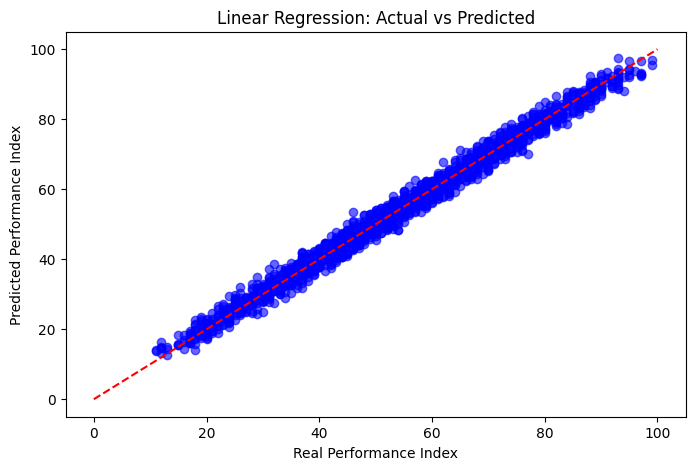

In [10]:
#linear regretion
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

df=pd.read_csv("Student_Performance.csv")

df['Extracurricular Activities']=df['Extracurricular Activities'].map(lambda x: 1 if x=='Yes' else 0)
x=df[['Hours Studied','Previous Scores','Extracurricular Activities','Sleep Hours','Sample Question Papers Practiced']]
y=df['Performance Index']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Lmodel=LinearRegression()

Lmodel.fit(x_train,y_train)
y_pred_L=Lmodel.predict(x_test)


LMSE=mean_squared_error(y_test,y_pred_L)

print(f"linear MSE: {LMSE}")

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_L, color='blue', alpha=0.6)
plt.plot([0,100],[0,100], color='red', linestyle='--')
plt.xlabel("Real Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()




poly MSE: 4.080643106151587


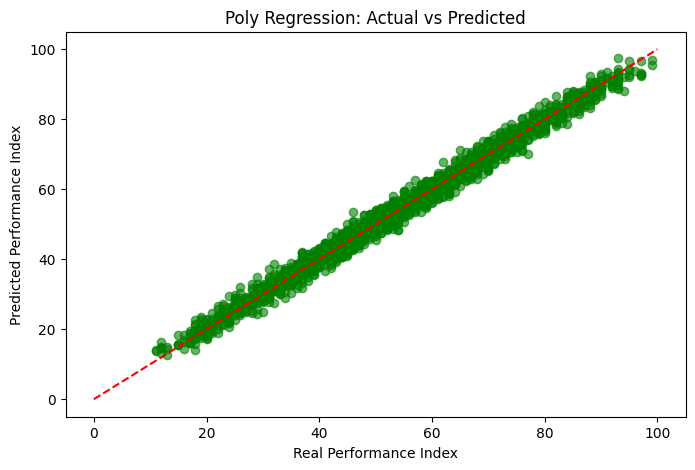

In [13]:
#poly regretion
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

polymodel=make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

polymodel.fit(x_train,y_train)
y_predict_poly=polymodel.predict(x_test)

pMSE=mean_squared_error(y_test,y_predict_poly)

print(f"poly MSE: {pMSE}")


plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_L, color='green', alpha=0.6)
plt.plot([0,100],[0,100], color='red', linestyle='--')
plt.xlabel("Real Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Poly Regression: Actual vs Predicted")
plt.show()

accurrancy: 0.9705
[[ 798   28]
 [  31 1143]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       826
           1       0.98      0.97      0.97      1174

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



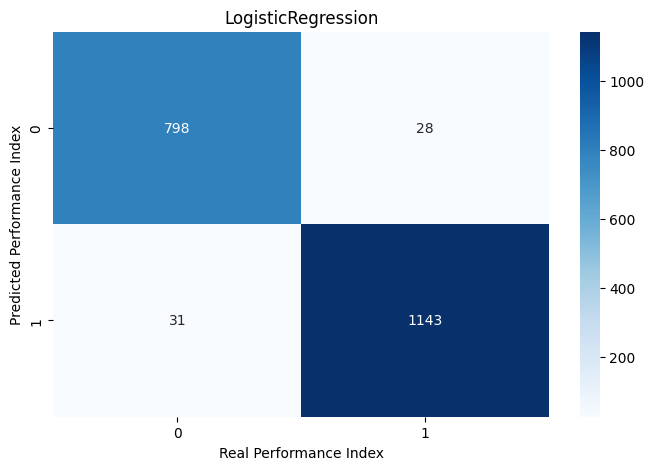

In [14]:
#logistic regretion
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns


y=df['Performance Index'].apply(lambda x:1 if x>=50 else 0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

y_pred_log=logmodel.predict(x_test)

acc=accuracy_score(y_test,y_pred_log)
cm=confusion_matrix(y_test,y_pred_log)
cl=classification_report(y_test,y_pred_log)

print(f"accurrancy: {acc}")
print(cm)
print(cl)

plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Real Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("LogisticRegression")
plt.show()